In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import joblib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

In [4]:
path="./dataset/"
file='Cor_train.pkl'
train_df= pd.read_pickle(path+file)
train_df

,monomer_ID,smiles,TC,Monomer_length,MW_ratio,Mass_max,Mass_ave,K_bond_min,K_bond_ave,K_ang_ave,...,Mor19,Mor31,SMR_VSA1,SMR_VSA3,SlogP_VSA5,SlogP_VSA10,EState_VSA1,EState_VSA5,VSA_EState4,VSA_EState7
1040,PI1127,*Oc1ccc(C(C)(C)c2ccc(OC(=O)SCCCSC(*)=O)cc2)cc1,0.187003,18.44,0.927781,32.067,8.445870,182.96,358.148750,58.585646,...,1.166168,0.340033,19.432465,0.000000,31.395199,9.589074,0.000000,17.325336,2.560220,0.834583
759,PI808,*Oc1c(cc(cc1)C(c1ccc(cc1)C(c1cc(c(cc1)OC(=O)*)...,0.234166,16.84,0.789839,15.999,6.905483,232.52,362.025082,57.530720,...,1.140136,1.159799,14.637928,0.000000,61.075658,4.794537,0.000000,27.817257,7.008897,0.000000
84,PI90,*C(C*)c1c(cccc1)COCCCCC,0.238572,2.61,0.137320,15.999,5.837514,218.51,342.141667,53.424955,...,0.931952,0.621401,4.736863,0.000000,43.733927,0.000000,0.000000,24.825916,3.085222,4.769873
1044,PI1132,*c1ccc(Cc2ccc(N(*)Cc3ccccc3)cc2)cc1,0.238998,10.35,0.667883,14.007,7.141132,250.32,370.125610,59.059072,...,0.332636,0.928172,0.000000,0.000000,16.690354,5.687386,0.000000,22.377741,5.591437,1.037233
159,PI165,*C(C*)c1ccc(cc1)C(=O)OCC(C)C,0.237524,2.60,0.137354,15.999,6.589323,218.51,354.499687,55.940966,...,0.671247,0.301739,9.531400,0.000000,36.189736,0.000000,0.000000,12.487189,2.129772,0.898828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,PI1034,*c1ccc(Oc2ccccc2Oc2ccc(N3C(=O)c4ccc(-c5ccc6c(c...,0.291517,19.40,1.000000,15.999,9.175433,272.66,386.618507,66.540036,...,-0.882484,0.684675,28.651875,5.316789,41.431955,5.687386,11.814359,11.383156,3.140823,0.000000
847,PI907,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C(C)(C)c4ccc(*)c...,0.165411,18.84,0.535101,32.067,10.467243,209.78,363.837179,70.708243,...,-0.420552,0.835887,81.159223,0.000000,36.101280,52.684981,90.978736,24.265468,-17.571201,-25.513996
715,PI764,*C(=O)NCCNC(=O)c1ccc(N2C(=O)c3ccc(*)cc3C2=O)cc1,0.262578,15.06,1.000000,15.999,8.824184,232.52,392.005122,65.872290,...,0.259140,0.368768,19.178149,10.633577,31.073966,10.481923,0.000000,0.000000,1.743724,0.091628
905,PI969,*C(=O)c1ccc2c(c1)C(=O)N(c1ccc(C3(c4ccc(N5C(=O)...,0.227667,22.24,1.000000,15.999,8.938690,250.32,381.584875,64.520630,...,-0.349817,1.229677,23.972686,0.000000,74.043749,11.374773,17.229350,9.799819,8.257228,0.067189


In [5]:
file1='Cor_test.pkl'
test_df= pd.read_pickle(path+file1)
test_df

,monomer_ID,smiles,TC,Monomer_length,MW_ratio,Mass_max,Mass_ave,K_bond_min,K_bond_ave,K_ang_ave,...,Mor19,Mor31,SMR_VSA1,SMR_VSA3,SlogP_VSA5,SlogP_VSA10,EState_VSA1,EState_VSA5,VSA_EState4,VSA_EState7
49,PI55,*/C=C/CCCCCCCCCC*,0.336325,13.27,1.000000,12.011,4.891412,232.52,334.952647,49.101667,...,1.418080,0.826599,0.000000,0.000000,57.787395,0.000000,0.000000,51.366573,0.000000,15.724121
741,PI790,*CC1(C)CC(*)(C)C(=O)OC1=O,0.185993,5.09,0.818005,15.999,7.341190,232.52,349.626364,58.537163,...,0.988033,0.405348,14.325937,0.000000,20.268296,0.000000,0.000000,0.000000,-0.315069,0.751157
358,PI375,*C(C*)OCCOC,0.251789,2.57,0.274694,15.999,6.007824,218.51,327.684118,56.395938,...,0.635721,0.326187,9.473726,0.000000,0.000000,0.000000,0.000000,6.923737,0.000000,0.000000
993,PI1071,*C(=O)c1ccc2c(c1)C(=O)N(c1c(C(C)C)cc(Cc3cc(C(C...,0.204283,22.41,0.742111,15.999,7.334730,232.52,364.596105,58.595404,...,1.990247,1.472253,23.972686,0.000000,164.232174,11.374773,0.000000,15.866187,9.279165,0.674761
639,PI684,*c1ccc(Cc2ccc(-n3c(=O)c4cc5c(=O)n(*)c(=O)c5cc4...,0.315177,16.51,0.931298,15.999,8.689638,250.32,379.708462,64.016256,...,-0.242217,0.753504,0.000000,9.551078,22.253806,0.000000,11.118534,34.309983,3.408797,0.778555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,PI637,*CCCCCCCCCCCNC(=O)CCCCC(=O)N*,0.299844,19.90,1.000000,15.999,5.593491,232.52,346.915472,52.457706,...,2.885457,1.069552,9.589074,11.050456,83.470681,0.000000,0.000000,51.366573,2.841408,14.971719
56,PI62,*C(CC)C(CC)*,0.250043,2.67,0.333333,12.011,4.675667,218.51,327.447778,49.052000,...,0.962662,0.572104,0.000000,0.000000,26.689118,0.000000,0.000000,25.683286,0.000000,5.559537
768,PI817,*Oc1c2c(ccc1)c(ccc2)OC(=O)Oc1ccc(cc1)OC(=O)*,0.241563,15.48,1.000000,15.999,9.478588,357.53,395.132703,69.056379,...,-0.376769,0.246920,28.906191,0.000000,0.000000,9.589074,6.155366,0.000000,0.000000,-0.846514
899,PI963,*c1ccc(Oc2ccc(S(=O)(=O)c3ccc(Oc4ccc(N5C(=O)c6c...,0.244103,31.65,1.000000,32.067,9.582653,209.78,390.896747,67.081307,...,-0.409144,1.287767,41.864209,5.316789,57.353395,5.687386,33.342037,84.179560,1.269442,0.000000


In [14]:
X_train=train_df.drop(train_df.columns[0:3], axis=1)
y_train=train_df["TC"]
X_test=test_df.drop(test_df.columns[0:3], axis=1)
y_test=test_df["TC"]

select_feature=[
'Monomer_length',
 'MW_ratio',
 'Mass_max',
 'Mass_ave',
 'K_bond_ave',
 'K_ang_ave',
 'nH',
 'AATS0d',
 'AATS0Z',
 'ATSC2Z',
 'ATSC5Z',
 'AATSC0Z',
 'AATSC2Z',
 'BCUTd-1h',
 'BCUTZ-1h',
 'nHBDon',
 'MIC0',
 'MIC1',
 'Kier3',
 'Mor02',
 'Mor14',
 'Mor19',
 'SMR_VSA1',
 'SMR_VSA3',
 'VSA_EState4']

X_selecttrain=X_train[select_feature]
X_selecttest=X_test[select_feature]
for i in [X_selecttrain,X_selecttest, y_train, y_test]:
    i.index = range(i.shape[0])
scaler.fit(X_selecttrain)
#scaler.fit(Xtest)
Xtrain  = scaler.transform(X_selecttrain)
Xtest = scaler.transform(X_selecttest)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math
import joblib

In [23]:
#RF model
print ("***==========Construction of RF model==========***")
n_estimator = int(1243.5126904380131)
max_depths = int(19.278129232569064)
min_samples_split=int(np.round(5.816558946743761))
min_samples_leaf=int(np.round(2.989362159767528))
rfg = RandomForestRegressor(n_estimators = n_estimator, max_features='auto',random_state=1, max_depth = max_depths,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
rfg.fit(Xtrain,y_train.values.ravel())
res = rfg.predict(Xtest)
print("Training set score: %f" % rfg.score(Xtrain,y_train))
print("Test set score: %f" % rfg.score(Xtest,y_test))
mse=mean_squared_error(y_test,res)
rmse=math.sqrt(mse)
print('MSE:{}'.format(mse))
print('RMSE:{}'.format(rmse))
RF_train= rfg.predict(Xtrain)
RF_test= rfg.predict(Xtest)

***==========Construction of RF model==========***
Training set score: 0.882925
Test set score: 0.777199
MSE:0.0008715691895641649
RMSE:0.029522350678158487


In [24]:
#KRR model
print ("***==========Construction of KRR model==========***")
alpha=0.026572614164137982
coef0=1.9368959359566578
degree=2.0677627000798404
gamma=0.0071451448056355305
kernel_chose=0.6307439327705886
if kernel_chose<=1:
    kernel="rbf"
elif kernel_chose>1 and kernel_chose<=2:
    kernel='laplacian'
elif kernel_chose>2 and kernel_chose<=3:
    kernel='polynomial'
else:
    kernel='sigmoid'
alpha=round(alpha,5)
gamma==round(gamma,5)
degree=round(degree)
coef0=round(coef0,1)
model=KernelRidge(kernel=kernel,alpha=alpha,gamma=gamma,degree=degree,coef0=coef0)
model.fit(Xtrain,y_train.values.ravel())
print("Training set score: %f" % model.score(Xtrain,y_train))
print("Test set score: %f" % model.score(Xtest,y_test))
KRR_train = model.predict(Xtrain)
KRR_test = model.predict(Xtest)
mse=mean_squared_error(y_test,KRR_test)
rmse=math.sqrt(mse)
print("MSE: %f" % mse)
print("RMSE: %f" % rmse)

***==========Construction of KRR model==========***
Training set score: 0.802712
Test set score: 0.780567
MSE: 0.000858
RMSE: 0.029298


In [28]:
#MLP model
print ("***==========Construction of MLP model==========***")
randomseed = np.random.seed(5)
clf = MLPRegressor(solver='lbfgs',alpha=0.181,
                   hidden_layer_sizes=[70, 70, 70, 70], max_iter=1000,
                   verbose=False, tol=0.0001,random_state=randomseed)
clf.fit(Xtrain,y_train.values.ravel())
print("Training set score: %f" % clf.score(Xtrain,y_train))
print("Test set score: %f" % clf.score(Xtest,y_test))
MLP_train = clf.predict(Xtrain)
MLP_test = clf.predict(Xtest)
mse=mean_squared_error(y_test,MLP_test)
rmse=math.sqrt(mse)
print("MSE: %f" % mse)
print("RMSE: %f" % rmse)

***==========Construction of MLP model==========***
Training set score: 0.853268
Test set score: 0.831127
MSE: 0.000661
RMSE: 0.025702


***==========Plots of RF model prediction results==========***


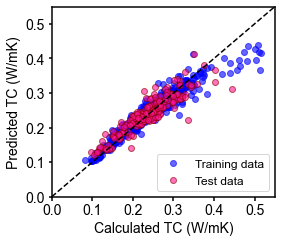

In [25]:
print ("***==========Plots of RF model prediction results==========***")
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
plt.figure(figsize=(4,3.5))
plt.plot(y_train,RF_train,color='blue',marker='o',linestyle='', markerfacecolor='b',alpha=0.6)
plt.plot(y_test,RF_test,color='darkred',marker='o',linestyle='', markerfacecolor='deeppink',alpha=0.6)
plt.legend(labels=["Training data","Test data"],loc="lower right",fontsize=12)  
title='Calculated TC (W/mK)'
title1='Predicted TC (W/mK)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((0, 0.55))
plt.ylim((0, 0.55))
plt.plot([0,0.55],[0,0.55], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(0,0.6,0.1)
my_y_ticks = np.arange(0,0.6,0.1)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.show()

***==========Plots of KRR model prediction results==========***


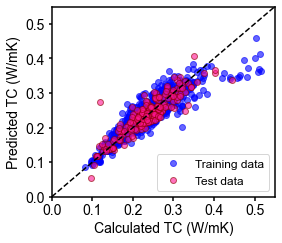

In [26]:
print ("***==========Plots of KRR model prediction results==========***")
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,KRR_train,color='blue',marker='o',linestyle='', markerfacecolor='b',alpha=0.6)
plt.plot(y_test,KRR_test,color='darkred',marker='o',linestyle='', markerfacecolor='deeppink',alpha=0.6)
plt.legend(labels=["Training data","Test data"],loc="lower right",fontsize=12)  
title='Calculated TC (W/mK)'
title1='Predicted TC (W/mK)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((0, 0.55))
plt.ylim((0, 0.55))
plt.plot([0,0.55],[0,0.55], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(0,0.6,0.1)
my_y_ticks = np.arange(0,0.6,0.1)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.show()

***==========Plots of MLP model prediction results==========***


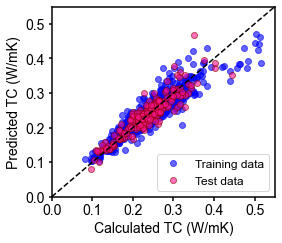

In [29]:
print ("***==========Plots of MLP model prediction results==========***")
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 14,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,MLP_train,color='blue',marker='o',linestyle='', markerfacecolor='b',alpha=0.6)
plt.plot(y_test,MLP_test,color='darkred',marker='o',linestyle='', markerfacecolor='deeppink',alpha=0.6)
plt.legend(labels=["Training data","Test data"],loc="lower right",fontsize=12)  
title='Calculated TC (W/mK)'
title1='Predicted TC (W/mK)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((0, 0.55))
plt.ylim((0, 0.55))
plt.plot([0,0.55],[0,0.55], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(0,0.6,0.1)
my_y_ticks = np.arange(0,0.6,0.1)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.show()

In [32]:
path1="./pretrained_model/"
RF_name = 'RF_Opt.model'
KRR_name = 'KRR_Opt.model'
MLP_name = 'MLP_Opt.model'
joblib.dump(rfg, path1+RF_name)
joblib.dump(model, path1+KRR_name)
joblib.dump(clf, path1+MLP_name)

['D:\\huangxiang\\pretrained_model\\MLP_Opt.model']